### Análise do arquivo “trabalho1.csv”
Tema do negócio: Imobiliário

Luísa Nascimento da Silva

In [28]:
import pandas as pd
import numpy as np

In [29]:
df = pd.read_csv(r"C:\Users\luisasx\Downloads\trabalho1.csv", sep=';', decimal=",", encoding='latin1')
display(df)

,área,quartos,vagas,valor unitário
0,91,2,2,8736.263736
1,90,2,2,8222.222222
2,103,3,2,9708.737864
3,95,3,2,11042.105260
4,103,3,2,8349.514563
5,95,3,2,8526.315789
6,90,3,2,8444.444444
7,87,3,2,8620.689655
8,103,3,2,9126.213592
9,109,4,2,8440.366972


In [30]:
import pandas as pd

# Passar um DataFrame com os nomes das colunas
X_pred_simples = pd.DataFrame([[area_imovel]], columns=['área'])
valor_estimado_simples = modelo_simples.predict(X_pred_simples)[0]

X_pred_multipla = pd.DataFrame([[area_imovel, quartos_imovel]], columns=['área', 'quartos'])
valor_estimado_multipla = modelo_multipla.predict(X_pred_multipla)[0]

In [31]:
#calcular o preço de um imóvel de 100m², 3 quartos e 2 vagas de garagem

from sklearn.linear_model import LinearRegression

X_area = df[['área']]
y = df['valor unitário']

modelo_area = LinearRegression()
modelo_area.fit(X_area, y)

area_estimativa = 100
valor_unitario_estimado_area = modelo_area.predict([[area_estimativa]])[0]

preco_imovel_area = area_estimativa * valor_unitario_estimado_area
print(f'O valor estimado do imóvel de {area_estimativa}m² (com base na área) é: R${preco_imovel_area:,.2f}')

X_quartos_vagas = df[['área', 'quartos', 'vagas']]
modelo_quartos_vagas = LinearRegression()
modelo_quartos_vagas.fit(X_quartos_vagas, y)

quartos_estimados = 3
vagas_estimadas = 2
valor_unitario_estimado_quartos_vagas = modelo_quartos_vagas.predict([[area_estimativa, quartos_estimados, vagas_estimadas]])[0]

preco_imovel_quartos_vagas = area_estimativa * valor_unitario_estimado_quartos_vagas
print(f'O valor estimado do imóvel de {area_estimativa}m², {quartos_estimados} quartos e {vagas_estimadas} vagas é: R${preco_imovel_quartos_vagas:,.2f}')



O valor estimado do imóvel de 100m² (com base na área) é: R$834,842.95
O valor estimado do imóvel de 100m², 3 quartos e 2 vagas é: R$832,125.46


C:\Users\luisasx\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\luisasx\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
#Fazer a média dos valores unitários dos apartamentos
media_valor_unitario = df['valor unitário'].mean()
print(f'A média dos valores unitários dos apartamentos é: R${media_valor_unitario:,.2f}')

A média dos valores unitários dos apartamentos é: R$8,374.22


In [33]:
# Calcular mediana, média aparada e desvio-padrão 
import numpy as np
from scipy.stats import trim_mean

mediana_valor_unitario = df['valor unitário'].median()
media_aparada_valor_unitario = trim_mean(df['valor unitário'], proportiontocut=0.1)
desvio_padrao_valor_unitario = df['valor unitário'].std()

print(f'Mediana dos valores unitários: R${mediana_valor_unitario:,.2f}')
print(f'Média aparada (10% das extremidades): R${media_aparada_valor_unitario:,.2f}')
print(f'Desvio-padrão dos valores unitários: R${desvio_padrao_valor_unitario:,.2f}')


Mediana dos valores unitários: R$8,440.37
Média aparada (10% das extremidades): R$8,315.78
Desvio-padrão dos valores unitários: R$1,098.37


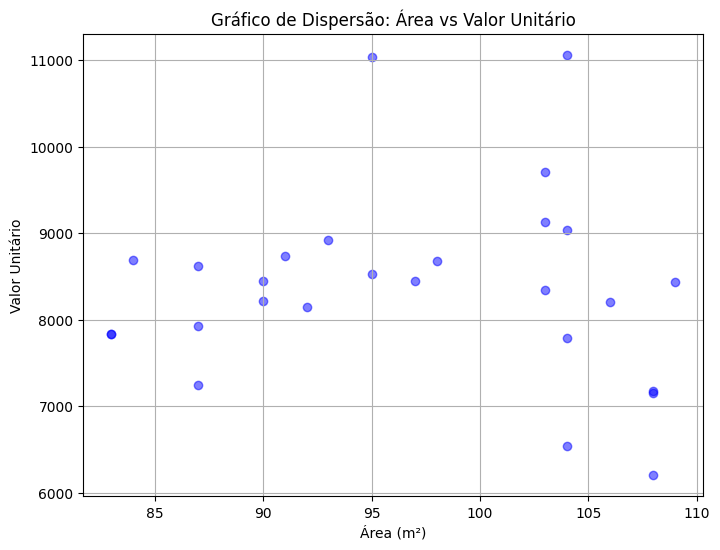

In [34]:
#Fazer um gráfico de dispersão e um boxplot 
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df['área'], df['valor unitário'], color='blue', alpha=0.5)
plt.title('Gráfico de Dispersão: Área vs Valor Unitário')
plt.xlabel('Área (m²)')
plt.ylabel('Valor Unitário')
plt.grid(True)
plt.show()


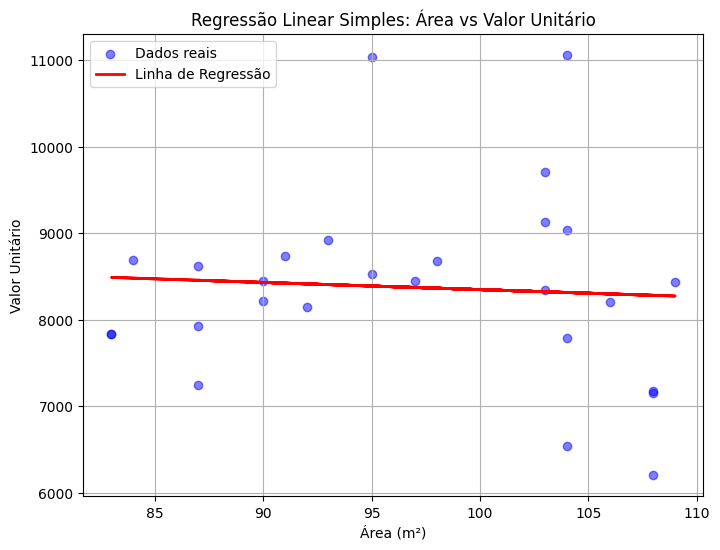

Coeficiente angular (slope): -8.29
Intercepto (intercept): 9177.33


In [35]:
#Fazer a regressão linear simples, em função da área (e gráfico)
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df[['área']]
y = df['valor unitário']

modelo = LinearRegression()
modelo.fit(X, y)

y_pred = modelo.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(df['área'], df['valor unitário'], color='blue', alpha=0.5, label='Dados reais')
plt.plot(df['área'], y_pred, color='red', linewidth=2, label='Linha de Regressão')
plt.title('Regressão Linear Simples: Área vs Valor Unitário')
plt.xlabel('Área (m²)')
plt.ylabel('Valor Unitário')
plt.legend()
plt.grid(True)
plt.show()

print(f'Coeficiente angular (slope): {modelo.coef_[0]:.2f}')
print(f'Intercepto (intercept): {modelo.intercept_:.2f}')



In [36]:
# Obter o valor para um imóvel com base na regressão
area_imovel = 100
valor_estimado = modelo.predict([[area_imovel]])[0]
print(f'O valor estimado para um imóvel de {area_imovel}m² é: R${valor_estimado:,.2f}')


O valor estimado para um imóvel de 100m² é: R$8,348.43


C:\Users\luisasx\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
# Calcular o coeficiente de determinação e de correlação
from sklearn.metrics import r2_score
import numpy as np

r2 = r2_score(y, y_pred)
print(f'Coeficiente de Determinação (R²): {r2:.2f}')

correlacao = np.corrcoef(df['área'], df['valor unitário'])[0, 1]
print(f'Coeficiente de Correlação (r): {correlacao:.2f}')


Coeficiente de Determinação (R²): 0.00
Coeficiente de Correlação (r): -0.07


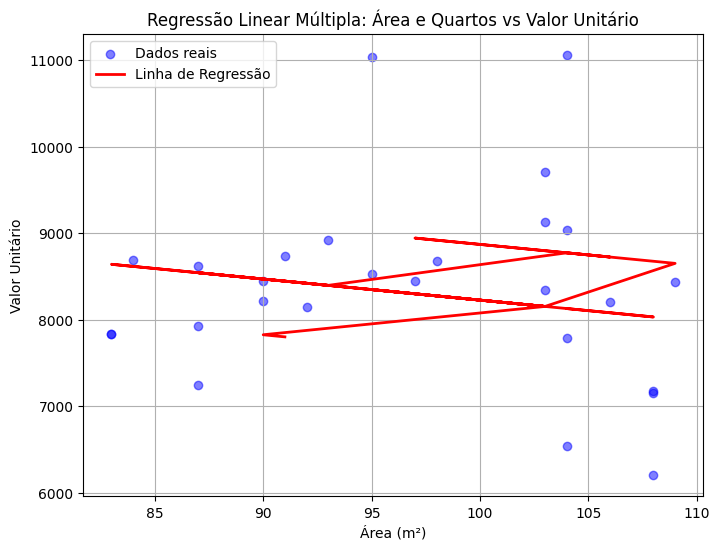

Coeficiente angular (slope) para área: -24.36
Coeficiente angular (slope) para quartos: 644.12
Intercepto (intercept): 8730.92


In [38]:
#Fazer a regressão linear múltipla, usando: área, quartos ou vagas

X = df[['área', 'quartos']]
y = df['valor unitário']

modelo = LinearRegression()
modelo.fit(X, y)

y_pred = modelo.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(df['área'], df['valor unitário'], color='blue', alpha=0.5, label='Dados reais')
plt.plot(df['área'], y_pred, color='red', linewidth=2, label='Linha de Regressão')
plt.title('Regressão Linear Múltipla: Área e Quartos vs Valor Unitário')
plt.xlabel('Área (m²)')
plt.ylabel('Valor Unitário')
plt.legend()
plt.grid(True)
plt.show()

print(f'Coeficiente angular (slope) para área: {modelo.coef_[0]:.2f}')
print(f'Coeficiente angular (slope) para quartos: {modelo.coef_[1]:.2f}')
print(f'Intercepto (intercept): {modelo.intercept_:.2f}')


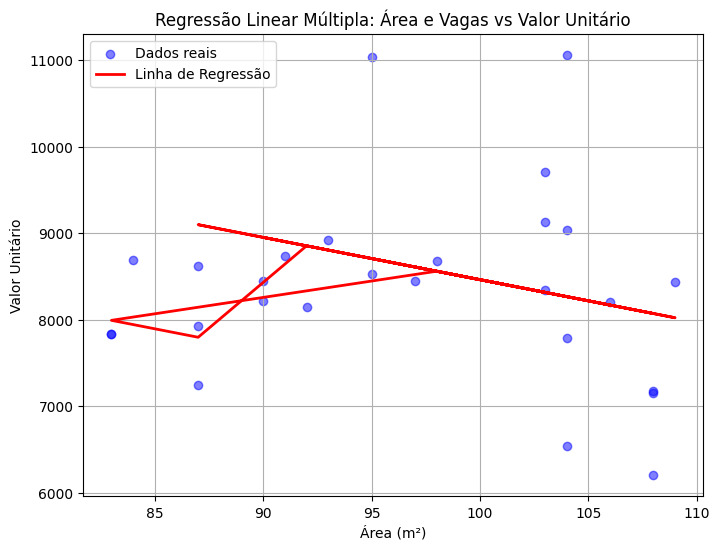

Coeficiente angular (slope) para área: -48.90
Coeficiente angular (slope) para vagas: 1301.25
Intercepto (intercept): 10750.73


In [39]:
X = df[['área', 'vagas']]
y = df['valor unitário']

modelo = LinearRegression()
modelo.fit(X, y)

y_pred = modelo.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(df['área'], df['valor unitário'], color='blue', alpha=0.5, label='Dados reais')
plt.plot(df['área'], y_pred, color='red', linewidth=2, label='Linha de Regressão')
plt.title('Regressão Linear Múltipla: Área e Vagas vs Valor Unitário')
plt.xlabel('Área (m²)')
plt.ylabel('Valor Unitário')
plt.legend()
plt.grid(True)
plt.show()

print(f'Coeficiente angular (slope) para área: {modelo.coef_[0]:.2f}')
print(f'Coeficiente angular (slope) para vagas: {modelo.coef_[1]:.2f}')
print(f'Intercepto (intercept): {modelo.intercept_:.2f}')


In [40]:
# Comparar os valores da média, regressão linear simples e regressão múltipla

X_simples = df[['área']]
y = df['valor unitário']
modelo_simples = LinearRegression()
modelo_simples.fit(X_simples, y)


X_multipla = df[['área', 'quartos']]
modelo_multipla = LinearRegression()
modelo_multipla.fit(X_multipla, y)


media_valor_unitario = df['valor unitário'].mean()

area_imovel = 100
valor_estimado_simples = modelo_simples.predict([[area_imovel]])[0]

quartos_imovel = 3
valor_estimado_multipla = modelo_multipla.predict([[area_imovel, quartos_imovel]])[0]

print(f'Valor Médio do Valor Unitário: R${media_valor_unitario:,.2f}')
print(f'Valor Estimado pela Regressão Linear Simples: R${valor_estimado_simples:,.2f}')
print(f'Valor Estimado pela Regressão Linear Múltipla: R${valor_estimado_multipla:,.2f}')


Valor Médio do Valor Unitário: R$8,374.22
Valor Estimado pela Regressão Linear Simples: R$8,348.43
Valor Estimado pela Regressão Linear Múltipla: R$8,226.85


C:\Users\luisasx\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\luisasx\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
#Os três valores são próximos?

from sklearn.linear_model import LinearRegression

X_simples = df[['área']]
y = df['valor unitário']
modelo_simples = LinearRegression()
modelo_simples.fit(X_simples, y)

X_multipla = df[['área', 'quartos']]
modelo_multipla = LinearRegression()
modelo_multipla.fit(X_multipla, y)

media_valor_unitario = df['valor unitário'].mean()

area_imovel = 100
valor_estimado_simples = modelo_simples.predict([[area_imovel]])[0]

quartos_imovel = 3
valor_estimado_multipla = modelo_multipla.predict([[area_imovel, quartos_imovel]])[0]

print(f'Valor Médio do Valor Unitário: R${media_valor_unitario:,.2f}')
print(f'Valor Estimado pela Regressão Linear Simples: R${valor_estimado_simples:,.2f}')
print(f'Valor Estimado pela Regressão Linear Múltipla: R${valor_estimado_multipla:,.2f}')

diferenca_simples = abs(media_valor_unitario - valor_estimado_simples)
diferenca_multipla = abs(media_valor_unitario - valor_estimado_multipla)

print(f'Diferença entre média e regressão simples: R${diferenca_simples:,.2f}')
print(f'Diferença entre média e regressão múltipla: R${diferenca_multipla:,.2f}')

if diferenca_simples < 100 and diferenca_multipla < 100:
    print('Os valores estão bastante próximos.')
else:
    print('Os valores estão distantes.')


Valor Médio do Valor Unitário: R$8,374.22
Valor Estimado pela Regressão Linear Simples: R$8,348.43
Valor Estimado pela Regressão Linear Múltipla: R$8,226.85
Diferença entre média e regressão simples: R$25.79
Diferença entre média e regressão múltipla: R$147.37
Os valores estão distantes.


C:\Users\luisasx\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\luisasx\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [3]:
#Qual valor você adotaria para o preço do apartamento, de acordo com essas variáveis?

# Carregar o DataFrame

import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv(r"C:\Users\luisasx\Downloads\trabalho1.csv", sep=';', decimal=",", encoding='latin1')

X_simples = df[['área']]
y = df['valor unitário']
modelo_simples = LinearRegression()
modelo_simples.fit(X_simples, y)

X_multipla = df[['área', 'quartos']]
modelo_multipla = LinearRegression()
modelo_multipla.fit(X_multipla, y)

area_imovel = 100
valor_estimado_simples = modelo_simples.predict(pd.DataFrame([[area_imovel]], columns=['área']))[0]

quartos_imovel = 3
valor_estimado_multipla = modelo_multipla.predict(pd.DataFrame([[area_imovel, quartos_imovel]], columns=['área', 'quartos']))[0]

print(f'Valor Estimado pela Regressão Linear Simples: R${valor_estimado_simples:,.2f}')
print(f'Valor Estimado pela Regressão Linear Múltipla: R${valor_estimado_multipla:,.2f}')



Valor Estimado pela Regressão Linear Simples: R$8,348.43
Valor Estimado pela Regressão Linear Múltipla: R$8,226.85
